In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import folium
import numpy as np 
import pandas as pd
import scipy as sp
import scipy.interpolate
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import tempfile
#import branca

In [2]:
geoGold = pd.read_csv('..\csv\geoGold_erro.csv')

In [3]:
#Separando os dataframes para plotar nos gráficos

mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
google = geoGold[geoGold['geoapi_id'] == 'Google']
tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']

m = np.asarray(mapbox['erro'].tolist())
min_m = np.min(m)
max_m = np.max(m)

g = np.asarray(google['erro'].tolist())
min_g = np.min(g)
max_g = np.max(g)

t = np.asarray(tomtom['erro'].tolist())
min_t = np.min(t)
max_t = np.max(t)

o = np.asarray(ors['erro'].tolist())
min_o = np.min(o)
max_o = np.max(o)

minimo = np.min(np.asanyarray([min_m, min_g, min_t, min_o]))
maximo = np.max(np.asanyarray([max_m, max_g, max_t, min_o]))



In [ ]:
plt.contour(x_mesh, y_mesh, z_mesh_smoothed, levels=15)
plt.plot(x, y, 'k.', markersize=0.5, alpha=0.5)

C:\Users\analu\AppData\Local\Temp\ipykernel_2576\3834768895.py:19: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


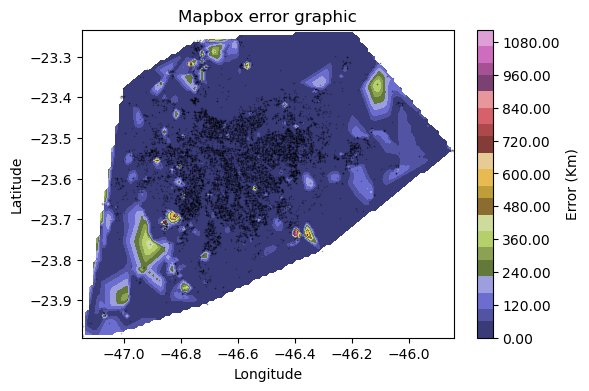

In [6]:

# Leitura dos dados de altitude do dataframe mapbox
x = np.asarray(mapbox['lonGold'].tolist())
y = np.asarray(mapbox['latGold'].tolist())
#erro_list = mapbox['erro'].tolist()
#erro_list.append(minimo)
#erro_list.append(maximo)
z = np.asarray(mapbox['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 100)
y_arr = np.linspace(np.min(y), np.max(y), 100)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação do mapa do Brasil com o Folium
#mapa = folium.Map(location=[-23.5489,-46.6388], zoom_start=10)

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do FeatureGroup para os marcadores
#marker_group = folium.FeatureGroup()

# Adicionar marcadores iterativos como pontos pequenos
#for lat, lon, alt in zip(mapbox['latGold'], mapbox['lonGold'], z):
#    icon_path = "C:/Users/analu/Downloads/pngfind.com-x-mark-png-98161.png" 
#    icon = folium.CustomIcon(icon_path, icon_size=(2, 2))
#    marker = folium.Marker(location=[lat, lon], icon=icon)
#    marker.add_child(folium.Popup(f"Latitude: {lat}<br>Longitude: {lon}"))
#    marker_group.add_child(marker)

# Adicionar o FeatureGroup ao mapa
#mapa.add_child(marker_group)

# Criação do contorno com escala completa de cores
contono = ax.contourf(x_mesh, y_mesh, z_mesh, levels=100, cmap='tab20b')
cbar = fig.colorbar(contono, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

# Salvar a figura em um buffer
#buffer = BytesIO()
#fig.savefig(buffer, format='png', bbox_inches='tight', transparent=True, pad_inches=0)
#buffer.seek(0)

# Criar objeto Image a partir do buffer
#image = Image.open(buffer)

# Salvar a imagem temporariamente em disco como um arquivo PNG
#with tempfile.NamedTemporaryFile(suffix='.png', dir='temp', delete=False) as temp_file:
#    temp_file_path = temp_file.name
#    image.save(temp_file_path)

# Adicionar a imagem como camada de sobreposição no mapa
#folium.raster_layers.ImageOverlay(
#    image=temp_file_path,
#    bounds=[[y_arr.min(), x_arr.min()], [y_arr.max(), x_arr.max()]],
#   opacity=0.8
#).add_to(mapa)

# Exibir o mapa
#mapa


plt.plot(x, y, 'x', color='black', markersize=0.5, alpha=0.3)
plt.title('Mapbox error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


C:\Users\analu\AppData\Local\Temp\ipykernel_2576\3988090056.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


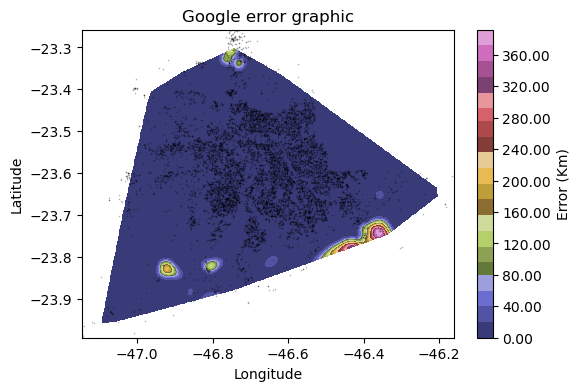

In [7]:
# Leitura dos dados de altitude do dataframe mapbox
x = np.asarray(google['lonGold'].tolist())
y = np.asarray(google['latGold'].tolist())
z = np.asarray(google['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação do mapa do Brasil com o Folium
#mapa = folium.Map(location=[-23.5489,-46.6388], zoom_start=10)

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do FeatureGroup para os marcadores
#marker_group = folium.FeatureGroup()

# Adicionar marcadores iterativos como pontos pequenos
#for lat, lon, alt in zip(here['latGold'], here['lonGold'], z):
#    icon_path = "C:/Users/analu/Downloads/pngfind.com-x-mark-png-98161.png" 
#    icon = folium.CustomIcon(icon_path, icon_size=(2, 2))
#    marker = folium.Marker(location=[lat, lon], icon=icon)
#    marker.add_child(folium.Popup(f"Latitude: {lat}<br>Longitude: {lon}"))
#    marker_group.add_child(marker)

# Adicionar o FeatureGroup ao mapa
#mapa.add_child(marker_group)

# Criação do contorno com escala completa de cores
contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

# Salvar a figura em um buffer
#buffer = BytesIO()
#fig.savefig(buffer, format='png', bbox_inches='tight', transparent=True, pad_inches=0)
#buffer.seek(0)

# Criar objeto Image a partir do buffer
#image = Image.open(buffer)

# Salvar a imagem temporariamente em disco como um arquivo PNG
#with tempfile.NamedTemporaryFile(suffix='.png', dir='temp', delete=False) as temp_file:
#    temp_file_path = temp_file.name
#    image.save(temp_file_path)

# Adicionar a imagem como camada de sobreposição no mapa
#folium.raster_layers.ImageOverlay(
#    image=temp_file_path,
#    bounds=[[y_arr.min(), x_arr.min()], [y_arr.max(), x_arr.max()]],
#    opacity=0.8
#).add_to(mapa)

# Exibir o mapa
#mapa

plt.plot(x, y, 'x', color='black', markersize=0.5, alpha=0.3)
plt.title('Google error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


C:\Users\analu\AppData\Local\Temp\ipykernel_2576\2226091746.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


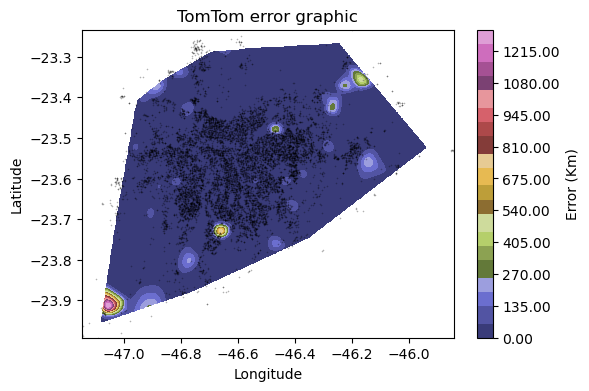

In [8]:
# Leitura dos dados de altitude do dataframe tomtom
x = np.asarray(tomtom['lonGold'].tolist())
y = np.asarray(tomtom['latGold'].tolist())
z = np.asarray(tomtom['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação do mapa do Brasil com o Folium
#mapa = folium.Map(location=[-23.5489,-46.6388], zoom_start=10)

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do FeatureGroup para os marcadores
#marker_group = folium.FeatureGroup()

# Adicionar marcadores iterativos como pontos pequenos
#for lat, lon, alt in zip(tomtom['latGold'], tomtom['lonGold'], z):
#    icon_path = "C:/Users/analu/Downloads/pngfind.com-x-mark-png-98161.png" 
#    icon = folium.CustomIcon(icon_path, icon_size=(2, 2))
#    marker = folium.Marker(location=[lat, lon], icon=icon)
#    marker.add_child(folium.Popup(f"Latitude: {lat}<br>Longitude: {lon}"))
#    marker_group.add_child(marker)

# Adicionar o FeatureGroup ao mapa
#mapa.add_child(marker_group)

# Criação do contorno com escala completa de cores
contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')
# Salvar a figura em um buffer
#buffer = BytesIO()
#fig.savefig(buffer, format='png', bbox_inches='tight', transparent=True, pad_inches=0)
#buffer.seek(0)

# Criar objeto Image a partir do buffer
#image = Image.open(buffer)

# Salvar a imagem temporariamente em disco como um arquivo PNG
#with tempfile.NamedTemporaryFile(suffix='.png', dir='temp', delete=False) as temp_file:
#    temp_file_path = temp_file.name
#    image.save(temp_file_path)

# Adicionar a imagem como camada de sobreposição no mapa
#folium.raster_layers.ImageOverlay(
#    image=temp_file_path,
#    bounds=[[y_arr.min(), x_arr.min()], [y_arr.max(), x_arr.max()]],
#    opacity=0.8
#).add_to(mapa)

# Exibir o mapa
#mapa

plt.plot(x, y, 'x', color='black', markersize=0.5, alpha=0.3)
plt.title('TomTom error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

C:\Users\analu\AppData\Local\Temp\ipykernel_2576\2564689078.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


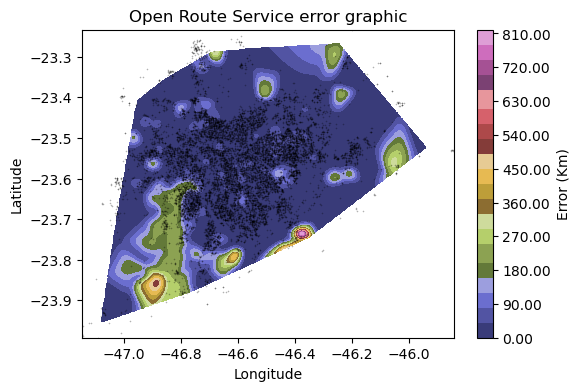

In [9]:
# Leitura dos dados de altitude do dataframe tomtom
x = np.asarray(ors['lonGold'].tolist())
y = np.asarray(ors['latGold'].tolist())
z = np.asarray(ors['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

fig, ax = plt.subplots(figsize=(6, 4))

contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.5, alpha=0.3)
plt.title('Open Route Service error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [ ]:
mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
here = geoGold[geoGold['geoapi_id'] == 'Here']
tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']


In [ ]:
mapbox.shape

In [ ]:
here.shape

In [ ]:
tomtom.shape